### Extract Data from Hardware Model and Simulations

In [6]:
import json
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

# Load the JSON data_design
filename = '10_nodes_20_factors_sf_65_all'

# Specify the path for the new folder
folder_path = Path(f"images/{filename}")
folder_path.mkdir(parents=True, exist_ok=True)

# Extract design data
with open(f"designs/{filename}.json") as f:
    data_design = json.load(f)

graph = data_design.get('inp_graph_topology', [])
designs = data_design.get('all_designs', [])

# Extract associated simulation data
with open(f"simulations/{filename}.json") as f:
    data_simulations = json.load(f)

# Initialize lists to store calculated values
performance_values = []
convergence_values = []
resource_percent_max = []
number_pes_values = []

# Iterate through each design
for design in designs:
    # Calculate performance value
    performance_value = (design['design']['number_pes'] * design['design']['nodes_updt_per_pe']) / design['latency']['latency_total']
    performance_values.append(performance_value)

    # Calculate convergence value
    for value in data_simulations:
        if value['number_pes'] == design['design']['number_pes'] and value['nodes_updt_per_pe'] == design['design']['nodes_updt_per_pe']:
            stream_passes = value['stream_passes']
    convergence_value = design['latency']['latency_total'] * stream_passes
    convergence_values.append(convergence_value)

    # Get maximum resource percentage
    resource_percent_max.append(max(design['resources']['resources_%'].values()))

    # Get number_pes
    number_pes_values.append(design['design']['number_pes'])


### Plot Performance against RU

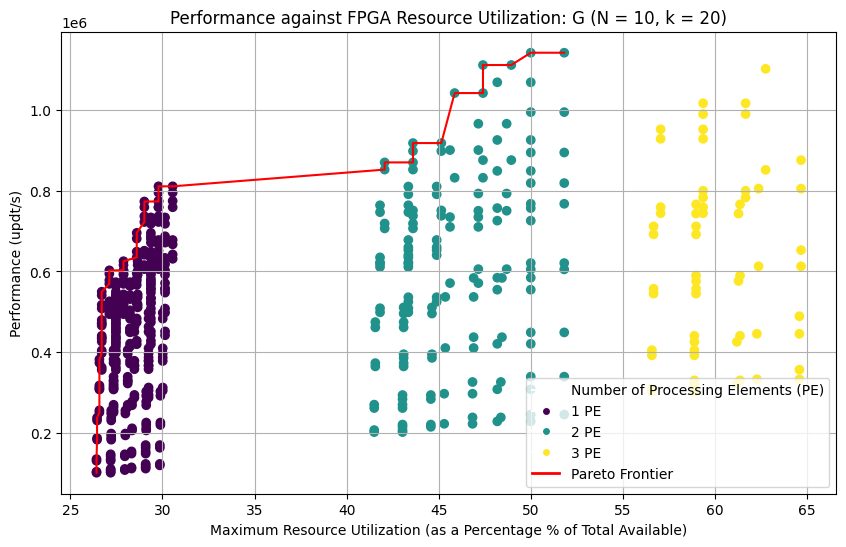

In [7]:
# Identify the Pareto frontier
pareto_indices = []
for i in range(len(resource_percent_max)):
    is_pareto = True
    for j in range(len(resource_percent_max)):
        if resource_percent_max[j] < resource_percent_max[i] and performance_values[j] > performance_values[i]:
            is_pareto = False
            break
    if is_pareto:
        pareto_indices.append(i)

# Extract Pareto frontier
pareto_resource = np.array([resource_percent_max[i] for i in pareto_indices])
pareto_performance = np.array([performance_values[i] for i in pareto_indices])

# Sort the Pareto frontier by both x-coordinate and y-coordinate
sorted_indices = np.lexsort((pareto_performance, pareto_resource))
pareto_resource_sorted = pareto_resource[sorted_indices]
pareto_performance_sorted = pareto_performance[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))

# Plot the scatter plot
scatter = plt.scatter(resource_percent_max, performance_values, c=number_pes_values, label='Number of PEs')

# Plot the Pareto frontier line
plt.plot(pareto_resource_sorted, pareto_performance_sorted, color='red', label='Pareto Frontier')

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', label='Number of Processing Elements (PE)')]
for i, pe in enumerate(np.unique(number_pes_values)):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(pe)), label=f'{pe} PE'))

legend_elements.append(plt.Line2D([0], [0], color='red', linewidth=2, label='Pareto Frontier'))

# Add legend
plt.legend(handles=legend_elements, fontsize=10, loc='lower right')  # Adjusted font size here

# Add labels and title
plt.xlabel('Maximum Resource Utilization (as a Percentage % of Total Available)', fontsize=10)  # Adjusted font size here
plt.ylabel('Performance (updt/s)', fontsize=10)  # Adjusted font size here
plt.title('Performance against FPGA Resource Utilization: G (N = {}, k = {})'.format(graph['N'], graph['k']), fontsize=12)  # Adjusted font size here

# Show plot
plt.grid(True)

plt.savefig(f"images/{filename}/performance_against_RU.png") 

plt.show()

### Plot Convergence against RU

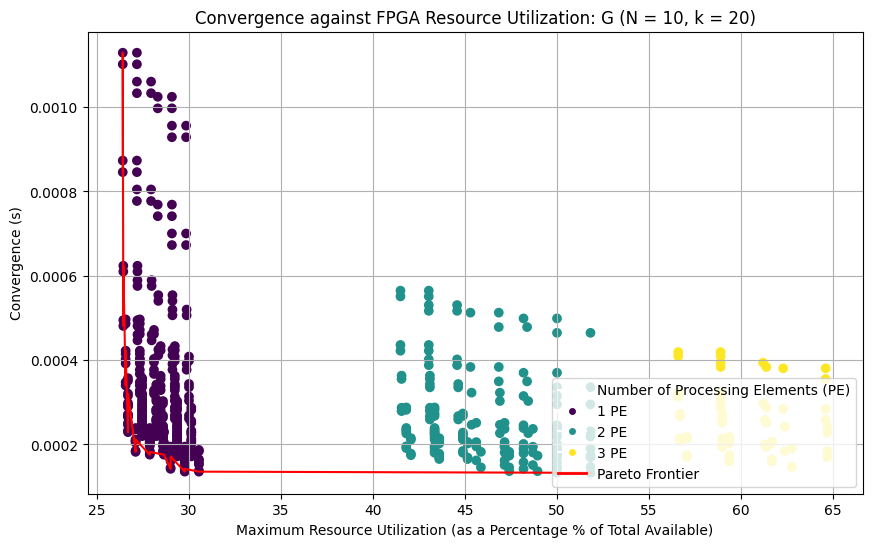

In [8]:
# Identify the Pareto frontier
pareto_indices = []
for i in range(len(resource_percent_max)):
    is_pareto = True
    for j in range(len(resource_percent_max)):
        if resource_percent_max[j] < resource_percent_max[i] and convergence_values[j] < convergence_values[i]:
            is_pareto = False
            break
    if is_pareto:
        pareto_indices.append(i)

# Extract Pareto frontier
pareto_resource = np.array([resource_percent_max[i] for i in pareto_indices])
pareto_performance = np.array([convergence_values[i] for i in pareto_indices])

# Sort the Pareto frontier by both x-coordinate and y-coordinate
sorted_indices = np.lexsort((pareto_performance, pareto_resource))
pareto_resource_sorted = pareto_resource[sorted_indices]
pareto_performance_sorted = pareto_performance[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))

# Plot the scatter plot
scatter = plt.scatter(resource_percent_max, convergence_values, c=number_pes_values, label='Number of PEs')

# Plot the Pareto frontier line
plt.plot(pareto_resource_sorted, pareto_performance_sorted, color='red', label='Pareto Frontier')

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', label='Number of Processing Elements (PE)')]
for i, pe in enumerate(np.unique(number_pes_values)):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(pe)), label=f'{pe} PE'))

legend_elements.append(plt.Line2D([0], [0], color='red', linewidth=2, label='Pareto Frontier'))

# Add legend
plt.legend(handles=legend_elements, fontsize=10, loc='lower right')  # Adjusted font size here

# Add labels and title
plt.xlabel('Maximum Resource Utilization (as a Percentage % of Total Available)', fontsize=10)  # Adjusted font size here
plt.ylabel('Convergence (s)', fontsize=10)  # Adjusted font size here
plt.title('Convergence against FPGA Resource Utilization: G (N = {}, k = {})'.format(graph['N'], graph['k']), fontsize=12)  # Adjusted font size here

# Show plot
plt.grid(True)
plt.savefig(f"images/{filename}/convergence_against_RU.png") 
plt.show()

### Plot Convergence against Performance

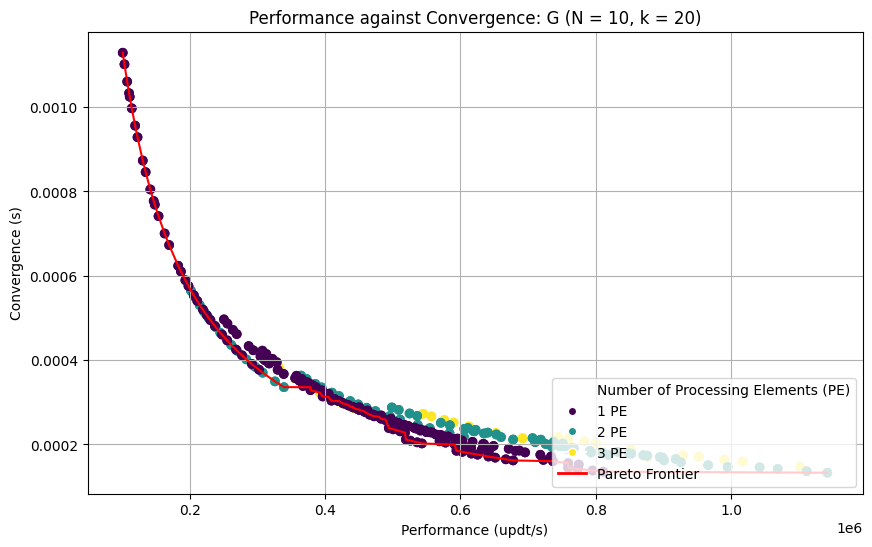

In [9]:
# Identify the Pareto frontier
pareto_indices = []
for i in range(len(performance_values)):
    is_pareto = True
    for j in range(len(performance_values)):
        if performance_values[j] < performance_values[i] and convergence_values[j] < convergence_values[i]:
            is_pareto = False
            break
    if is_pareto:
        pareto_indices.append(i)

# Extract Pareto frontier
pareto_resource = np.array([performance_values[i] for i in pareto_indices])
pareto_performance = np.array([convergence_values[i] for i in pareto_indices])

# Sort the Pareto frontier by both x-coordinate and y-coordinate
sorted_indices = np.lexsort((pareto_performance, pareto_resource))
pareto_resource_sorted = pareto_resource[sorted_indices]
pareto_performance_sorted = pareto_performance[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))

# Plot the scatter plot
log_convergence = [np.log(i) for i in convergence_values]
scatter = plt.scatter(performance_values, convergence_values, c=number_pes_values, label='Number of PEs')

# Plot the Pareto frontier line
plt.plot(pareto_resource_sorted, pareto_performance_sorted, color='red', label='Pareto Frontier')

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', label='Number of Processing Elements (PE)')]
for i, pe in enumerate(np.unique(number_pes_values)):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(pe)), label=f'{pe} PE'))

legend_elements.append(plt.Line2D([0], [0], color='red', linewidth=2, label='Pareto Frontier'))

# Add legend
plt.legend(handles=legend_elements, fontsize=10, loc='lower right')  # Adjusted font size here

# Add labels and title
plt.xlabel('Performance (updt/s)', fontsize=10)  # Adjusted font size here
plt.ylabel('Convergence (s)', fontsize=10)  # Adjusted font size here
plt.title('Performance against Convergence: G (N = {}, k = {})'.format(graph['N'], graph['k']), fontsize=12)  # Adjusted font size here

# Show plot
plt.grid(True)
plt.savefig(f"images/{filename}/convergence_against_performance.png") 
plt.show()